<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Voting_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
mlxtend.__version__

'0.21.0'

In [ ]:
df = sns.load_dataset(name='iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


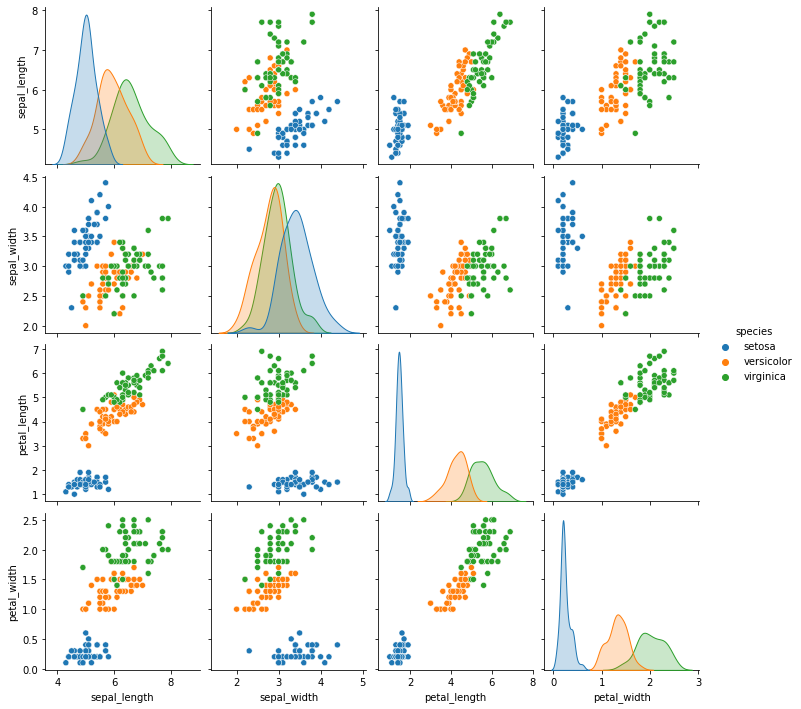

In [ ]:
# plotting a pairplot

sns.pairplot(df,hue='species')

- Selecting Sepal width and sepal length as the features for voting classifier as these features have data points merged into each other and somewhat difficult to classify

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# make X and y
X = df.drop(columns=df.columns[2:])
y = df['species']
X

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

estimator_list = [lr,dt,svm]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from mlxtend.plotting import plot_decision_regions

The score of LogisticRegression() is 0.8133333333333332


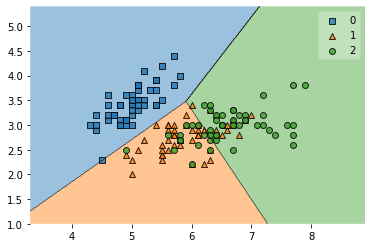

The score of DecisionTreeClassifier() is 0.7066666666666666


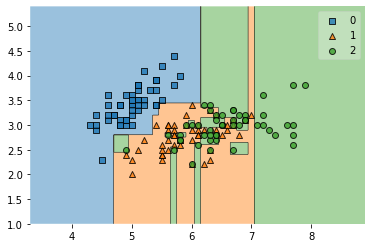

The score of SVC() is 0.82


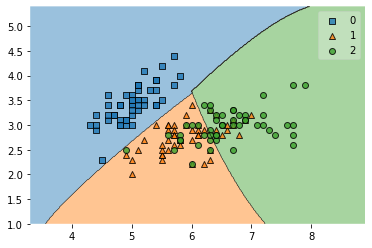

In [ ]:
for model in estimator_list:
    model.fit(X,y)
    y_pred = model.predict(X)
    score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
    print(f'The score of {model} is',np.mean(score))

    plot_decision_regions(X.values,y,model)
    plt.show()

The mean score is 0.8133333333333335


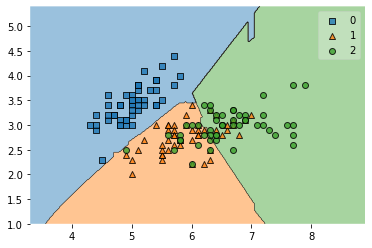

In [ ]:
est = [('lr',lr),('dt',dt),('svm',svm)]

voting = VotingClassifier(estimators=est)
voting.fit(X,y)

score = cross_val_score(voting,X,y,cv=10,scoring='accuracy')

print('The mean score is',score.mean())

plot_decision_regions(X.values,y,voting)
plt.show()

In [ ]:
# weighted voting classifier
max = 0
for i in range(1,6):
    for j in range(1,4):
        for k in range(1,6):
            voting = VotingClassifier(estimators=est,weights=[i,j,k])
            voting.fit(X,y)

            score = cross_val_score(voting,X,y,cv=5,scoring='accuracy')
            mean_score = np.mean(score)

            if max < mean_score:
                max = mean_score
            else:
                pass

            print(f'The mean score for {i}lr, {j}dt, {k}svm is',mean_score)
print()
print('The max sscore is',max)

The mean score for 1lr, 1dt, 1svm is 0.82
The mean score for 1lr, 1dt, 2svm is 0.8133333333333332
The mean score for 1lr, 1dt, 3svm is 0.82
The mean score for 1lr, 1dt, 4svm is 0.82
The mean score for 1lr, 1dt, 5svm is 0.82
The mean score for 1lr, 2dt, 1svm is 0.78
The mean score for 1lr, 2dt, 2svm is 0.82
The mean score for 1lr, 2dt, 3svm is 0.8133333333333332
The mean score for 1lr, 2dt, 4svm is 0.82
The mean score for 1lr, 2dt, 5svm is 0.82
The mean score for 1lr, 3dt, 1svm is 0.72
The mean score for 1lr, 3dt, 2svm is 0.7666666666666667
The mean score for 1lr, 3dt, 3svm is 0.82
The mean score for 1lr, 3dt, 4svm is 0.8133333333333332
The mean score for 1lr, 3dt, 5svm is 0.82
The mean score for 2lr, 1dt, 1svm is 0.82
The mean score for 2lr, 1dt, 2svm is 0.82
The mean score for 2lr, 1dt, 3svm is 0.8133333333333332
The mean score for 2lr, 1dt, 4svm is 0.82
The mean score for 2lr, 1dt, 5svm is 0.82
The mean score for 2lr, 2dt, 1svm is 0.82
The mean score for 2lr, 2dt, 2svm is 0.82
The me

In [ ]:
# combine same model with different hyperparameters

lr1 = LogisticRegression(C=0.01)
lr2 = LogisticRegression(C=0.1)
lr3 = LogisticRegression(C=1)
lr4 = LogisticRegression(C=10)
lr5 = LogisticRegression(C=100)

estimators = [('lr1',lr1),('lr2',lr2),('lr3',lr3),('lr4',lr4),('lr5',lr5)]

voting_combined = VotingClassifier(estimators=estimators)

The accuracy score is for model lr1 is 0.7333333333333333


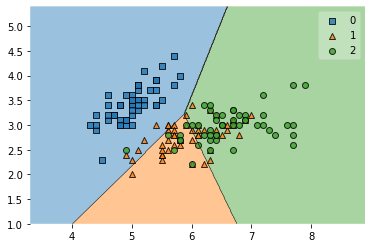

The accuracy score is for model lr2 is 0.8333333333333334


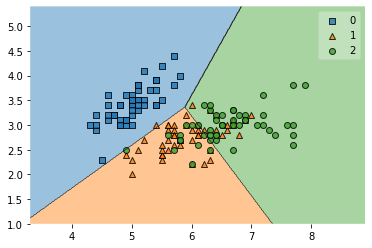

The accuracy score is for model lr3 is 0.8133333333333332


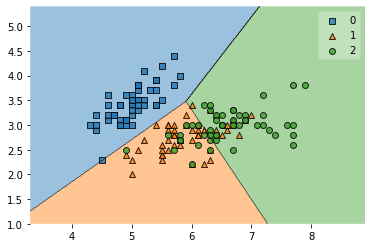

The accuracy score is for model lr4 is 0.82


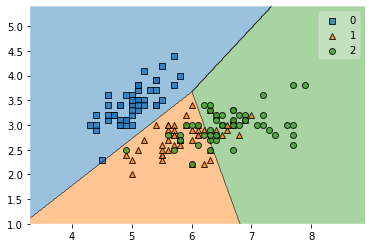

The accuracy score is for model lr5 is 0.82


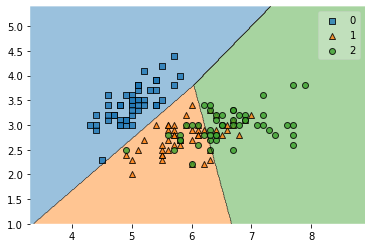

In [ ]:
# run individual models and get the score and graphs

for model in estimators:
    model[1].fit(X,y)
    score = cross_val_score(model[1],X,y,cv=5,scoring='accuracy')
    mean_score = np.mean(score)

    print(f'The accuracy score is for model {model[0]} is',mean_score)

    plot_decision_regions(X.values,y,model[1])
    plt.show()

The mean score is 0.8200000000000001


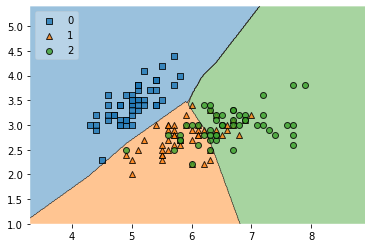

In [ ]:
# fitting the model for voting classifier
voting_combined.fit(X,y)

score = cross_val_score(voting_combined,X,y,cv=10,scoring='accuracy')

print('The mean score is',score.mean())

plot_decision_regions(X.values,y,voting_combined,legend=2)
plt.show()

The decision boundary of the combined model has started to smoothen out and can be observed in the graph.